In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training11.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,0.042594,0.069670,0.233757,0.132539,0.078830,0.128298,0.127252,0.028799,0.092669,0.0,...,0.129430,0,0.000000,0.0,0.0,0.0,0.129430,0.0,0,208500
1,0.013152,0.082892,0.258426,0.107690,0.122852,0.120843,0.119857,0.000000,0.123243,0.0,...,0.124259,0,0.000000,0.0,0.0,0.0,0.124259,0.0,0,181500
2,0.040965,0.069394,0.308067,0.126509,0.075178,0.122255,0.121322,0.022985,0.061598,0.0,...,0.124978,0,0.000000,0.0,0.0,0.0,0.124978,0.0,0,223500
3,0.047630,0.060798,0.256542,0.126379,0.075142,0.116660,0.119209,0.000000,0.027150,0.0,...,0.123944,0,0.124409,0.0,0.0,0.0,0.000000,0.0,0,140000
4,0.036753,0.077239,0.355347,0.129696,0.066782,0.108574,0.107688,0.044761,0.074829,0.0,...,0.112651,0,0.000000,0.0,0.0,0.0,0.112651,0.0,0,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.142333,0.153551,0.334565,0.524853,-0.315803,-0.472650,-0.499125,0.430345,0.332447,-0.033716,...,-0.354417,NaN,-0.131030,-0.050800,-0.019783,-0.048756,-0.249486,0.333237,NaN,1.000000
GrLivArea,0.120719,0.127222,0.008331,0.458779,-0.189161,-0.218697,-0.219837,0.314464,0.031921,-0.061258,...,-0.151926,NaN,-0.057856,-0.043154,0.007535,-0.002907,-0.103951,0.118027,NaN,0.607572
BsmtQual_Ex,-0.067336,0.110156,0.067300,0.348260,-0.213320,-0.159737,-0.176944,0.292843,0.219931,-0.043845,...,-0.294995,NaN,-0.055523,-0.015651,-0.027086,-0.035153,-0.231383,0.342712,NaN,0.530566
TotalBsmtSF,-0.249588,0.188220,0.075357,0.407939,-0.225604,-0.121166,-0.151733,0.281911,0.423329,0.085864,...,-0.222430,NaN,-0.033628,-0.063965,-0.074703,0.025350,-0.163098,0.229862,NaN,0.526490
GarageCars,-0.018763,0.150428,0.031077,0.494672,-0.234319,-0.088925,-0.128104,0.308173,0.161393,-0.066607,...,-0.213203,NaN,-0.114808,-0.109711,0.015857,-0.012673,-0.130096,0.257483,NaN,0.524947
OverallQual,0.168467,0.066253,-0.315555,1.000000,0.013580,0.245853,0.217332,0.300476,0.115412,-0.102320,...,-0.132284,NaN,-0.088225,-0.040849,-0.075064,-0.019867,-0.064936,0.266964,NaN,0.524853
GarageArea,-0.093239,0.183610,0.084616,0.432730,-0.215405,-0.131911,-0.167525,0.309273,0.214881,-0.039942,...,-0.235569,NaN,-0.102522,-0.106532,-0.014841,-0.017159,-0.141364,0.262419,NaN,0.524351
KitchenQual_Ex,-0.045219,0.075053,0.082089,0.310253,-0.121018,-0.163811,-0.169290,0.214144,0.184403,-0.036469,...,-0.210962,NaN,0.004694,-0.014103,-0.024406,-0.031675,-0.205273,0.250091,NaN,0.481160
1stFlrSF,-0.239974,0.213064,0.017884,0.329802,-0.200665,-0.126223,-0.145328,0.251188,0.333430,0.065461,...,-0.210962,NaN,-0.033945,-0.040522,0.046827,0.030706,-0.160864,0.182668,NaN,0.467500
Foundation_PConc,0.095374,0.006098,-0.093198,0.553635,-0.264221,0.063893,0.026830,0.159577,0.056796,-0.147740,...,-0.176319,NaN,-0.095768,0.007612,-0.043421,-0.035719,-0.139283,0.306872,NaN,0.443080


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=DecisionTreeRegressor(criterion='absolute_error',splitter='random',max_features='log2')

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'GrLivArea', 'BsmtQual_Ex', 'TotalBsmtSF', 'GarageCars',
       'OverallQual', 'GarageArea', 'KitchenQual_Ex', '1stFlrSF',
       'Foundation_PConc'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,29885.373288,44285.950835,0.744307
1,11,31821.407534,50669.093691,0.665287
2,12,32056.630137,51689.956174,0.651664
3,13,37256.339041,62657.836789,0.488157
4,14,32512.756849,54342.950244,0.614989
...,...,...,...,...
105,115,34438.510274,55634.368774,0.596473
106,116,35240.006849,50818.155825,0.663315
107,117,34808.986301,56605.062879,0.582269
108,118,34669.239726,58537.733025,0.553257


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
21,31,26744.065068,38452.453391,0.807232
23,33,28089.801370,42903.943630,0.760017
16,26,28238.308219,44782.440233,0.738542
7,17,29219.527397,47007.530256,0.711915
0,10,29885.373288,44285.950835,0.744307
...,...,...,...,...
28,38,36297.208904,62895.179385,0.484272
35,45,36759.400685,64345.695110,0.460210
26,36,36970.065068,59446.022766,0.539286
3,13,37256.339041,62657.836789,0.488157


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22460\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22460\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


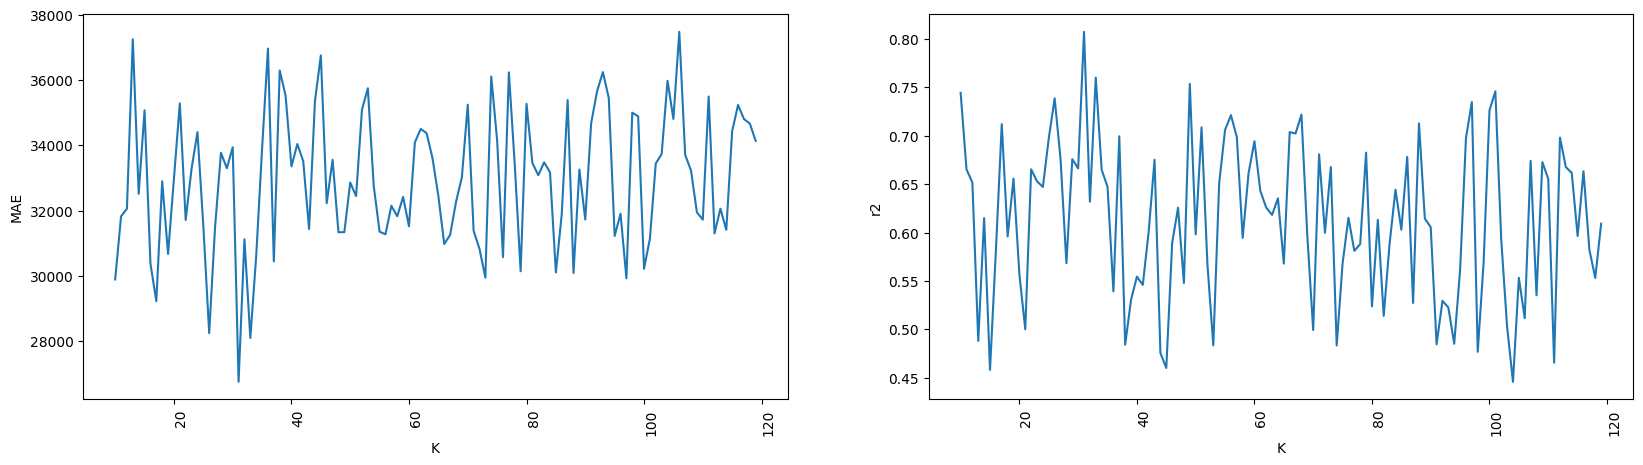

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               9.838685e-04
LotFrontage              4.121579e-04
LotArea                  1.359001e-02
OverallQual              6.131891e-04
OverallCond              4.291545e-04
                             ...     
SaleCondition_Family     2.350442e-04
SaleCondition_Normal     2.429358e-03
SaleCondition_Partial    1.656760e-03
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,33862.260274,54651.596107,0.610604
1,101,31919.681507,48925.418407,0.687928
2,102,36336.078767,60264.396434,0.526513
3,103,32501.417808,52216.450387,0.644532
4,104,31934.226027,50272.281737,0.670509
...,...,...,...,...
395,495,49643.671233,78858.144423,0.189264
396,496,55613.962329,86009.911560,0.035542
397,497,48377.568493,74954.333395,0.267547
398,498,47869.551370,72278.810359,0.318904


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
68,168,28278.650685,46750.199270,0.715060
45,145,29213.123288,42629.462241,0.763078
70,170,29607.181507,41652.093141,0.773817
121,221,29863.006849,44265.537816,0.744543
213,313,30516.500000,45638.394439,0.728452
...,...,...,...,...
392,492,51369.212329,79398.229766,0.178121
384,484,51815.119863,81303.031734,0.138214
389,489,52752.616438,82406.407344,0.114664
382,482,53540.708904,82290.067675,0.117162


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22460\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22460\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


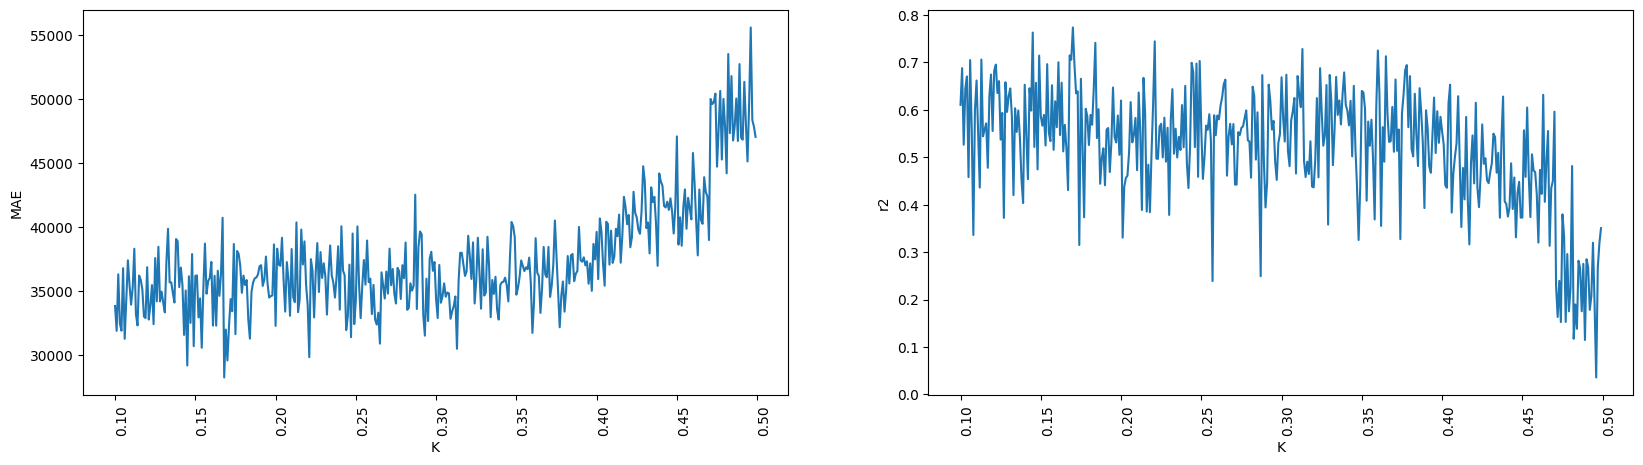

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


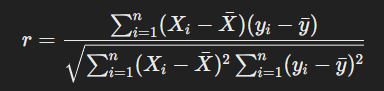

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.5248525198657468


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22460\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[['GrLivArea', 0.6075721273224745]]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'BsmtQual_Ex'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,33486.851027,52840.300258,0.635987
1,6,30848.821918,48806.875191,0.689438
2,7,31759.996575,48543.677210,0.692779
3,8,35324.150685,58702.112897,0.550744
4,9,32119.191781,56446.864518,0.584601
...,...,...,...,...
110,115,33633.143836,56099.014733,0.589705
111,116,33541.866438,57154.550185,0.574119
112,117,37123.773973,69512.773410,0.370036
113,118,33971.434932,51615.333079,0.652669


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
60,65,28879.092466,46441.021173,0.718817
51,56,29689.777397,42781.408701,0.761386
61,66,29794.958904,47658.130188,0.703885
28,33,29817.530822,50031.709486,0.673655
42,47,29834.441781,44336.010893,0.743729
...,...,...,...,...
37,42,37700.297945,63992.558457,0.466118
103,108,37837.520548,61396.136266,0.508563
26,31,38317.845890,63111.235725,0.480722
92,97,38414.106164,62533.527159,0.490186


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22460\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22460\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


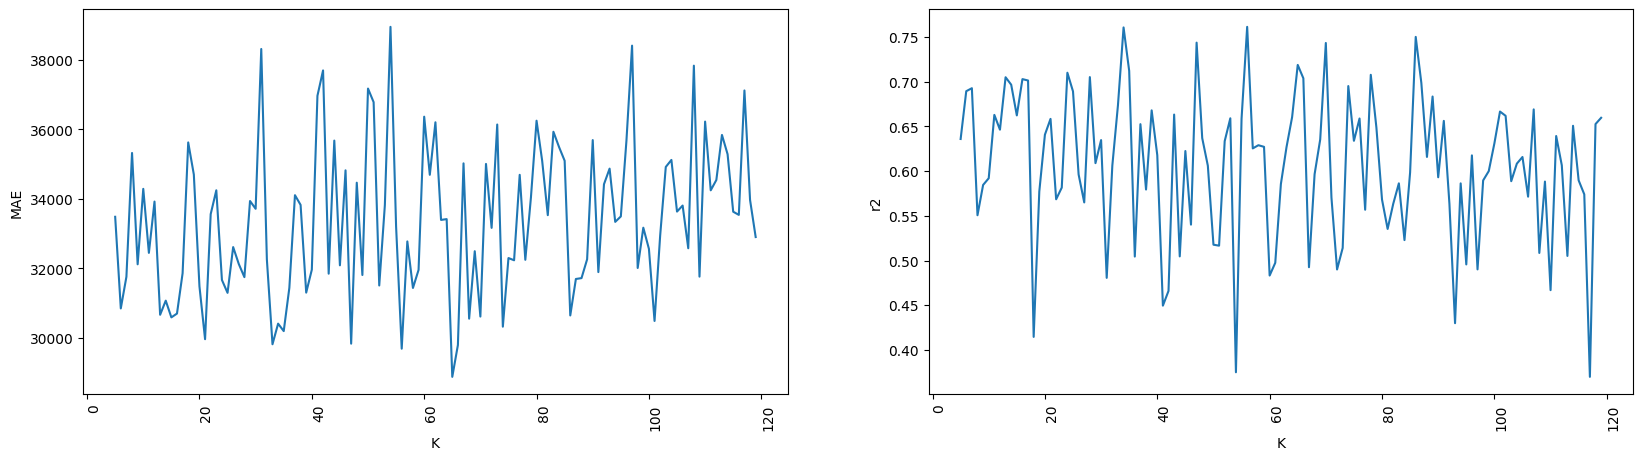

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

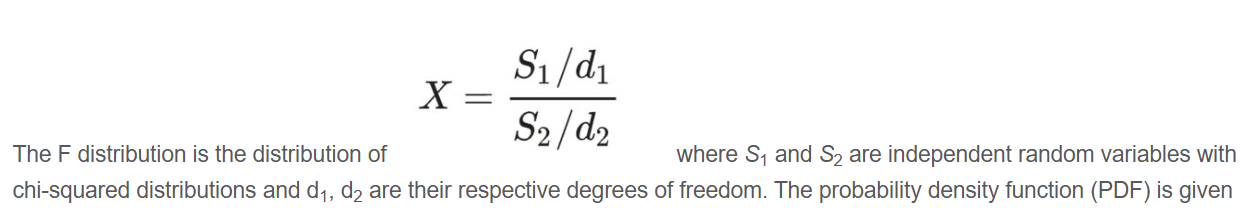

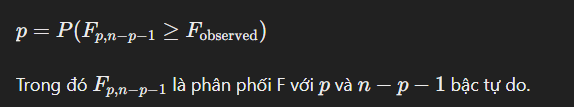

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,32216.571918,51029.290761,0.660511
1,6,31696.952055,51785.612944,0.650373
2,7,30930.285959,45474.885169,0.730394
3,8,28150.852740,41612.531800,0.774247
4,9,26277.441781,39881.420468,0.792639
...,...,...,...,...
110,115,33571.458904,57774.979377,0.564823
111,116,32946.318493,53217.789456,0.630768
112,117,32988.753425,50576.188337,0.666513
113,118,34779.452055,56433.891155,0.584792


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
11,16,24976.722603,34850.428132,0.841656
5,10,25390.113014,35078.864098,0.839573
10,15,26017.061644,39126.966192,0.800410
4,9,26277.441781,39881.420468,0.792639
6,11,26552.075342,39692.033468,0.794604
...,...,...,...,...
66,71,35260.452055,68090.517888,0.395551
65,70,35864.301370,57054.036897,0.575616
61,66,36253.284247,60739.563847,0.519017
72,77,37272.945205,73860.213265,0.288775


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22460\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22460\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


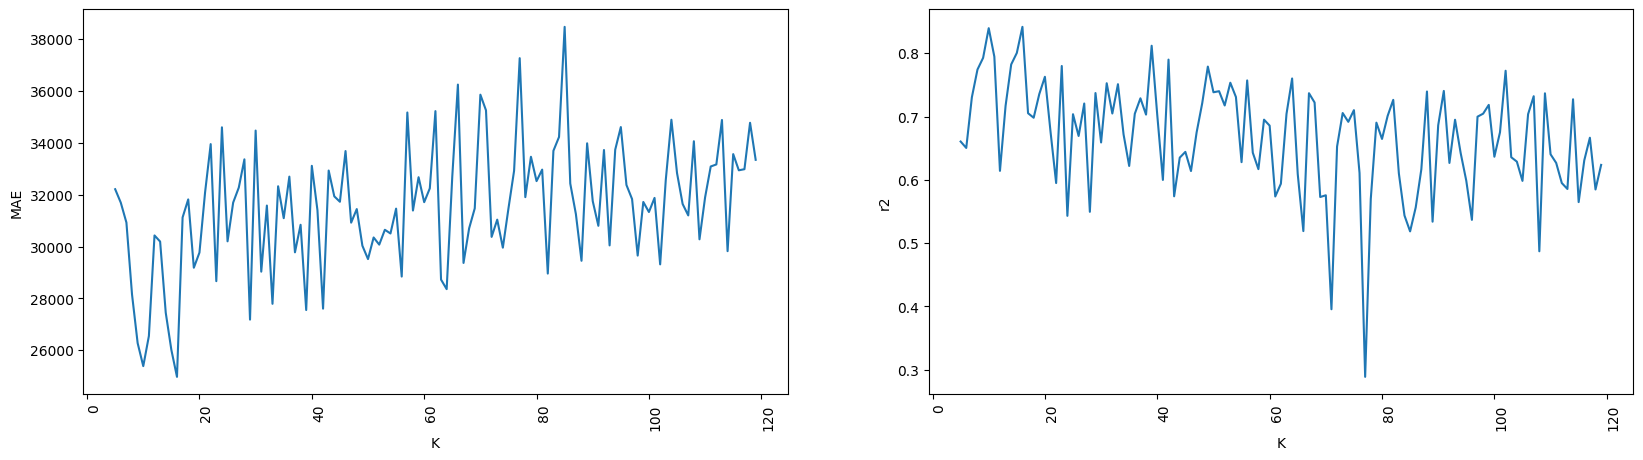

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

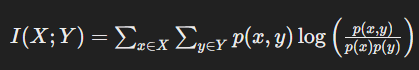

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

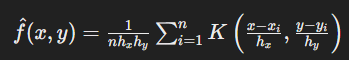

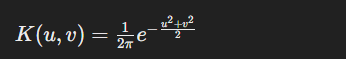

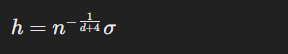

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,39627.815068,68191.403351,0.393759
1,6,37640.099315,54624.284514,0.610993
2,7,35358.599315,51110.347128,0.659432
3,8,35860.250000,52292.541255,0.643495
4,9,35136.479452,53140.292446,0.631842
...,...,...,...,...
110,115,34068.619863,52729.197494,0.637516
111,116,28002.342466,43610.788564,0.752044
112,117,31519.410959,50537.045250,0.667029
113,118,37077.797945,69901.739183,0.362967


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
111,116,28002.342466,43610.788564,0.752044
76,81,28290.972603,46931.281017,0.712849
26,31,29048.369863,47047.671566,0.711423
20,25,29110.164384,50847.657016,0.662924
43,48,29266.445205,44961.473597,0.736447
...,...,...,...,...
56,61,37093.113014,60051.329726,0.529855
92,97,37543.421233,66237.294777,0.428006
1,6,37640.099315,54624.284514,0.610993
87,92,38764.921233,67080.746471,0.413346


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22460\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22460\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


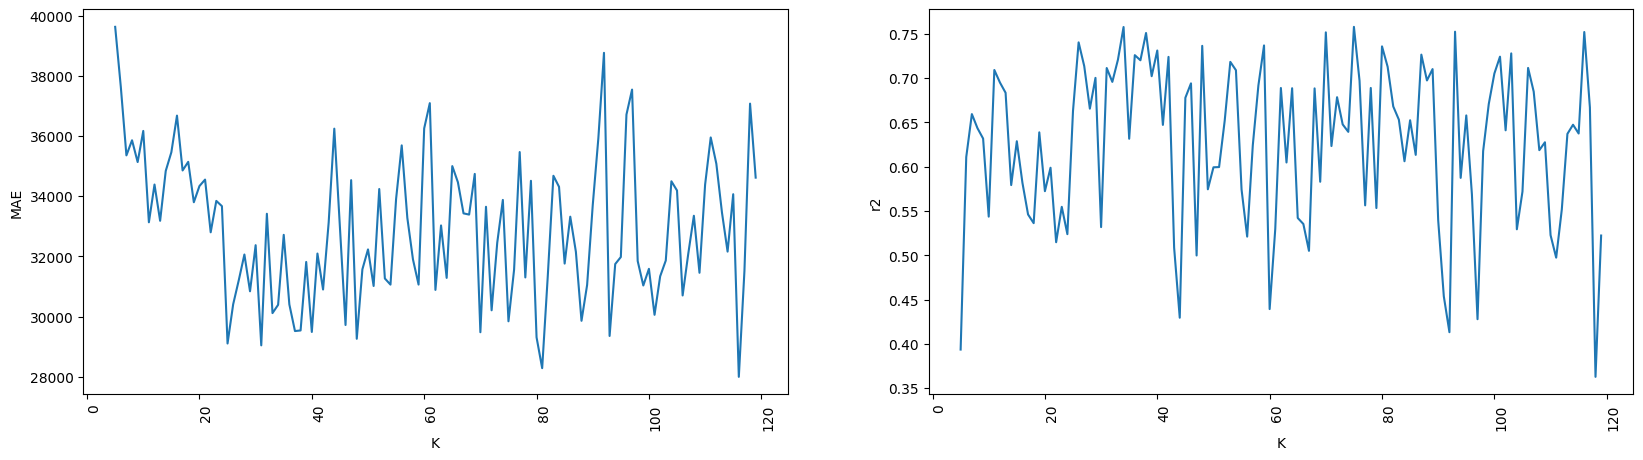

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,31560.575342,50068.250848,0.673178
1,6,37268.369863,63118.426673,0.480604
2,7,31834.030822,50089.586562,0.672900
3,8,33577.784247,52015.322304,0.647265
4,9,32562.397260,46754.415034,0.715009
...,...,...,...,...
110,115,33832.448630,55431.215287,0.599415
111,116,34311.726027,52722.370015,0.637610
112,117,34871.212329,59317.920420,0.541269
113,118,33505.989726,56583.617992,0.582585


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,29836.982877,46021.517796,0.723874
1,6,30975.407534,52537.408866,0.640148
2,7,28945.708904,42109.346665,0.768824
3,8,30102.448630,45378.980694,0.731530
4,9,29723.811644,48678.393565,0.691071
...,...,...,...,...
110,115,36689.190068,63031.086871,0.482041
111,116,32813.222603,50706.018896,0.664799
112,117,31002.445205,51795.635006,0.650238
113,118,33097.780822,52218.078533,0.644510


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,39627.815068,68191.403351,0.393759
1,6,37640.099315,54624.284514,0.610993
2,7,35358.599315,51110.347128,0.659432
3,8,35860.250000,52292.541255,0.643495
4,9,35136.479452,53140.292446,0.631842
...,...,...,...,...
110,115,34068.619863,52729.197494,0.637516
111,116,28002.342466,43610.788564,0.752044
112,117,31519.410959,50537.045250,0.667029
113,118,37077.797945,69901.739183,0.362967


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,31560.575342,50068.250848,0.673178,29836.982877,46021.517796,0.723874
1,6,37268.369863,63118.426673,0.480604,30975.407534,52537.408866,0.640148
2,7,31834.030822,50089.586562,0.672900,28945.708904,42109.346665,0.768824
3,8,33577.784247,52015.322304,0.647265,30102.448630,45378.980694,0.731530
4,9,32562.397260,46754.415034,0.715009,29723.811644,48678.393565,0.691071
...,...,...,...,...,...,...,...
110,115,33832.448630,55431.215287,0.599415,36689.190068,63031.086871,0.482041
111,116,34311.726027,52722.370015,0.637610,32813.222603,50706.018896,0.664799
112,117,34871.212329,59317.920420,0.541269,31002.445205,51795.635006,0.650238
113,118,33505.989726,56583.617992,0.582585,33097.780822,52218.078533,0.644510


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,31560.575342,50068.250848,0.673178,29836.982877,46021.517796,0.723874,39627.815068,68191.403351,0.393759
1,6,37268.369863,63118.426673,0.480604,30975.407534,52537.408866,0.640148,37640.099315,54624.284514,0.610993
2,7,31834.030822,50089.586562,0.672900,28945.708904,42109.346665,0.768824,35358.599315,51110.347128,0.659432
3,8,33577.784247,52015.322304,0.647265,30102.448630,45378.980694,0.731530,35860.250000,52292.541255,0.643495
4,9,32562.397260,46754.415034,0.715009,29723.811644,48678.393565,0.691071,35136.479452,53140.292446,0.631842
...,...,...,...,...,...,...,...,...,...,...
110,115,33832.448630,55431.215287,0.599415,36689.190068,63031.086871,0.482041,34068.619863,52729.197494,0.637516
111,116,34311.726027,52722.370015,0.637610,32813.222603,50706.018896,0.664799,28002.342466,43610.788564,0.752044
112,117,34871.212329,59317.920420,0.541269,31002.445205,51795.635006,0.650238,31519.410959,50537.045250,0.667029
113,118,33505.989726,56583.617992,0.582585,33097.780822,52218.078533,0.644510,37077.797945,69901.739183,0.362967


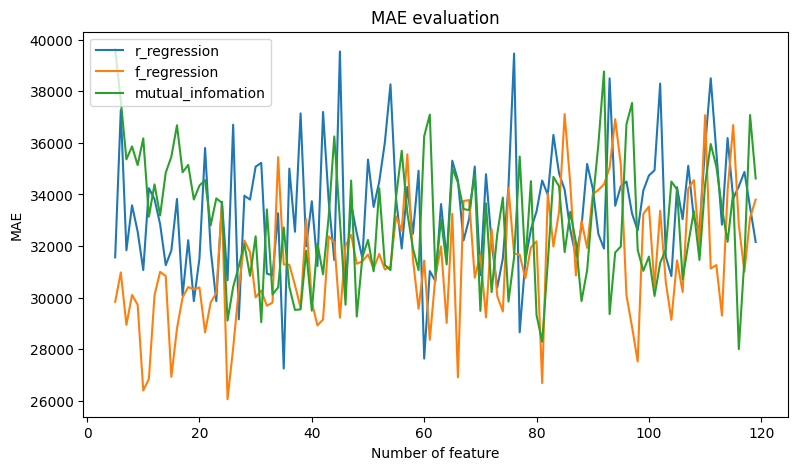

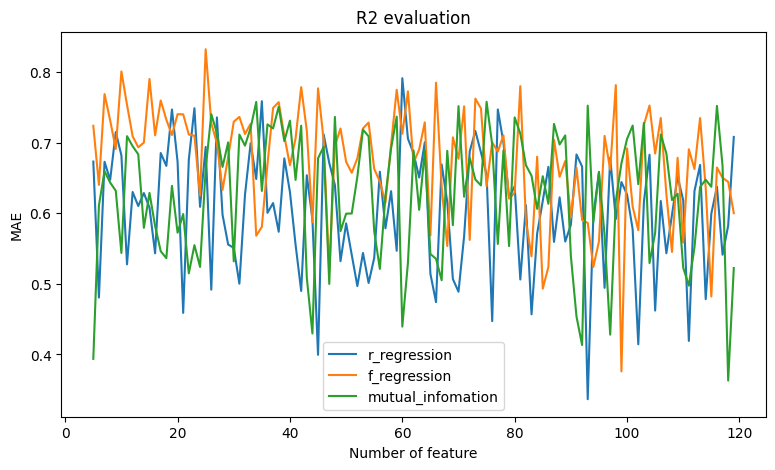

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()